
# *Table of Contents*

- [0. Context and Metadata](#0-context)  
- [1 Cleaning Inconsistencies](#1-cleaning)  
    -[1.1 Cleaning Brand](#1.1-brand)  
    -[1.2 Cleaning Model](#1.2-model)  
    -[1.3 Cleaning Transmission](#1.3-rest)  
    -[1.4 Cleaning Nonsense](#1.4-nonsense)  
- [2 Preprocessing](#2-preprocessing)  
    -[0.2.1 Feature Engineering](#2.1-feature)  
    -[0.2.2 Splitting Train and Test](#2.2-train)  
    -[0.2.3 Cleaning Outliers](#2.3-outliers)  
    -[0.2.4 Filling Null](#2.4-nan)    
- [3 Modelling](#3-modelling)  
- [4 Test](#4-test)  

    
        
   


# 0. Context and Metadata <a class="anchor" id="0-context"></a>
`carID`. - An attribute that contains an identifier for each car.  
`Brand`. - The car’s main brand (e.g. Ford, Toyota)  
`model` - The car model  
`year` - The year of Registration of the Car  
`mileage` - The total reported distance travelled by the car (in miles)  
`tax` - The amount of road tax (in £) that, in 2020, was applicable to the car in question.  
`fuelType` - Type of Fuel used by the car (Diesel, Petrol, Hybrid, Electric)  
`mpg` - Average Miles per Gallon  
`engineSize` - Size of Engine in liters (Cubic Decimeters)  
`paintQuality%` - The mechanic’s assessment of the cars’ overall paint quality and hull integrity (filled by the mechanic during evaluation).  
`previousOwners` - Number of previous registered owners of the vehicle.  
`hasDamage` - Boolean marker filled by the seller at the time of registration stating whether the car is damaged or not.  
`price` - The car’s price when purchased by Cars 4 You (in £).  


In [1]:
#general imports that we will need will almost always use - it is a good practice to import all libraries at the beginning of the notebook or script
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import math

# data partition
from sklearn.model_selection import train_test_split

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE


# embedded methods
from sklearn.linear_model import LassoCV

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

#set random seed for reproducibility
RSEED = 42
np.random.seed(RSEED)

In [2]:
def load_data(filepath: str): 
    """
    Load any dataset from a CSV file into a pandas DataFrame.
    
    Args:
        filepath (str): Path to the CSV file
        
    Returns:
        pd.DataFrame: Loaded dataset
    """
    df = pd.read_csv(filepath)
    return df

In [3]:
df = load_data("train.csv")
df.T

,0,1,2,3,4,5,6,7,8,9,...,75963,75964,75965,75966,75967,75968,75969,75970,75971,75972
carID,69512,53000,6366,29021,10062,14704,6924,50783,67071,23348,...,67221,41090,16023,60263,44131,37194,6265,54886,860,15795
Brand,VW,Toyota,Audi,Ford,BMW,BMW,Audi,Skoda,VW,Ford,...,VW,Mercedes,Ford,Opel,Mercedes,Mercedes,Audi,Toyota,Audi,Ford
model,Golf,Yaris,Q2,FIESTA,2 Series,3 Series,A3,Octavia,Passat,Focus,...,T-Roc,GLC Class,EcoSport,Crossland X,GLC Class,C Class,Q3,Aygo,Q3,Fiesta
year,2016.0,2019.0,2019.0,2018.0,2019.0,2014.0,2017.0,2017.0,2017.0,2019.0,...,2020.0,2016.0,2017.0,2018.0,2018.0,2015.0,2013.0,2017.0,2015.0,2018.0
price,22290,13790,24990,12500,22995,8199,16089,7500,15999,15300,...,25785,24486,10498,13995,30495,13498,12495,8399,12990,10495
transmission,Semi-Auto,Manual,Semi-Auto,anual,Manual,anual,Manual,Manual,Semi-Auto,Manual,...,Semi-Auto,NaN,Manual,Manual,Semi-Auto,Manual,Semi-Auto,Automatic,Manual,Manual
mileage,28421.0,4589.0,3624.0,9102.0,1000.0,101153.348285,21396.0,116750.0,30339.0,10700.0,...,10.0,22955.0,13613.0,1800.0,11943.0,14480.0,52134.0,11304.0,69072.0,16709.0
fuelType,Petrol,Petrol,Petrol,Petrol,Petrol,Diesel,Petrol,Diesel,Diesel,Petrol,...,Petrol,Diesel,Petrol,Petrol,Diesel,etrol,Diesel,Petrol,iesel,Petro
tax,NaN,145.0,145.0,145.0,145.0,30.0,20.0,145.0,150.0,150.0,...,145.0,125.0,125.0,150.0,150.0,125.0,200.0,145.0,125.0,145.0
mpg,11.417268,47.9,40.9,65.7,42.8,65.7,60.1,68.9,62.8,60.1,...,39.8,56.5,88.32164,57.7,56.5,53.3,47.9,67.0,60.1,64.2


In [4]:
def get_unique_values(df):
    # Get unique values for each column as lists
    unique_values_dict = {column: df[column].unique().tolist() for column in df.columns}
    
    # Find the maximum length of unique values
    max_length = max(len(values) for values in unique_values_dict.values())
    
    # Determine padding value based on column type
    padded_dict = {}
    for column, values in unique_values_dict.items():
        # Check if column is numeric (int or float)
        if pd.api.types.is_numeric_dtype(df[column]):
            padding_value = np.nan
        else:
            padding_value = None
        # Pad the list to max_length
        padded_dict[column] = values + [padding_value] * (max_length - len(values))
    
    # Convert padded dictionary to DataFrame
    unique_df = pd.DataFrame(padded_dict)
    
    return unique_df

In [5]:
def get_unique_column_values(df, column_name):
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame. Available columns: {list(df.columns)}")
    if pd.api.types.is_object_dtype(df[column_name]) or pd.api.types.is_string_dtype(df[column_name]):
        values = df[column_name].astype(str).str.strip().replace('nan', np.nan).unique()
    else:
        values = df[column_name].unique()
    return [x for x in values.tolist() if pd.notna(x) and x is not None]

In [6]:
get_unique_values(df).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           72 non-null     object 
 2   model           735 non-null    object 
 3   year            44 non-null     float64
 4   price           11048 non-null  float64
 5   transmission    40 non-null     object 
 6   mileage         34808 non-null  float64
 7   fuelType        34 non-null     object 
 8   tax             65 non-null     float64
 9   mpg             217 non-null    float64
 10  engineSize      58 non-null     float64
 11  paintQuality%   88 non-null     float64
 12  previousOwners  23 non-null     float64
 13  hasDamage       1 non-null      float64
dtypes: float64(9), int64(1), object(4)
memory usage: 8.1+ MB


# 1. Cleaning Inconsistencies <a class="anchor" id="1-cleaning"></a>

# 1.1 Cleaning Brand <a class="anchor" id="11-brand"></a>

In [7]:
def clean_categorical(dirty_data, mapping, print_unique=False):
    """
    Clean a Pandas Series or iterable of categorical data using a mapping dictionary.
    
    Args:
        dirty_data: Pandas Series or iterable containing categorical values to clean.
        mapping: Dictionary mapping incorrect variations (lowercase) to standardized values.
        print_unique: Bool, if True, prints unique cleaned values (excluding None).
    
    Returns:
        pandas.Series or list: Cleaned data with same type as input (Series if input is Series, else list).
    
    Raises:
        ValueError: If dirty_data is not iterable, mapping is not provided, not a dictionary, or empty.
    """
    import pandas as pd

    # Validate inputs
    if dirty_data is None:
        raise ValueError("dirty_data must be provided")
    if mapping is None:
        raise ValueError("mapping must be provided")
    if not isinstance(mapping, dict):
        raise ValueError("mapping must be a dictionary")
    if not mapping:
        raise ValueError("mapping cannot be empty")
    
    # Check if dirty_data is iterable (excluding strings)
    try:
        iter(dirty_data)
        if isinstance(dirty_data, str):
            raise ValueError("dirty_data cannot be a string")
    except TypeError:
        raise ValueError("dirty_data must be a Pandas Series or iterable")

    # Handle Series input
    if isinstance(dirty_data, pd.Series):
        # Filter non-None values and convert to list
        non_none_values = [str(value).strip() for value in dirty_data if pd.notna(value)]
        # Clean values: map variations to correct values, keep unmapped values unchanged
        cleaned_values = [mapping.get(value.lower(), value) for value in non_none_values]
        # Create output Series, aligning with original index
        result = pd.Series(index=dirty_data.index, dtype=object)
        idx = 0
        for i, value in dirty_data.items():
            if pd.notna(value):
                result[i] = cleaned_values[idx]
                idx += 1
            else:
                result[i] = value  # Preserve None or np.nan
        # Print unique cleaned values if requested
        if print_unique:
            unique_cleaned = sorted(set(v for v in cleaned_values if pd.notna(v)))
            print("Unique cleaned values:", unique_cleaned)
        return result
    
    # Handle list/iterable input
    cleaned_values = []
    for value in dirty_data:
        if pd.notna(value):
            cleaned_value = mapping.get(str(value).strip().lower(), str(value).strip())
            cleaned_values.append(cleaned_value)
        else:
            cleaned_values.append(value)  # Preserve None or np.nan
    # Print unique cleaned values if requested
    if print_unique:
        unique_cleaned = sorted(set(v for v in cleaned_values if pd.notna(v)))
        print("Unique cleaned values:", unique_cleaned)
    return cleaned_values

In [8]:
# Dictionary mapping variations to correct brand names
brand_mapping = {
    'vw': 'Volkswagen', 'v': 'Volkswagen', 'w': 'Volkswagen',
    'toyota': 'Toyota', 'toyot': 'Toyota', 'oyota': 'Toyota',
    'audi': 'Audi', 'aud': 'Audi', 'udi': 'Audi', 'ud': 'Audi',
    'ford': 'Ford', 'for': 'Ford', 'ord': 'Ford', 'or': 'Ford',
    'bmw': 'BMW', 'mw': 'BMW', 'bm': 'BMW',
    'skoda': 'Skoda', 'skod': 'Skoda', 'koda': 'Skoda', 'kod': 'Skoda',
    'opel': 'Opel', 'ope': 'Opel', 'pel': 'Opel', 'pe': 'Opel',
    'mercedes': 'Mercedes', 'mercede': 'Mercedes', 'ercedes': 'Mercedes', 
    'ercede': 'Mercedes',
    'hyundai': 'Hyundai', 'hyunda': 'Hyundai', 'yundai': 'Hyundai', 'yunda': 'Hyundai'
}

df["Brand"] = clean_categorical(df["Brand"],brand_mapping)
get_unique_values(df).info()
get_unique_column_values(df, "Brand")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           9 non-null      object 
 2   model           735 non-null    object 
 3   year            44 non-null     float64
 4   price           11048 non-null  float64
 5   transmission    40 non-null     object 
 6   mileage         34808 non-null  float64
 7   fuelType        34 non-null     object 
 8   tax             65 non-null     float64
 9   mpg             217 non-null    float64
 10  engineSize      58 non-null     float64
 11  paintQuality%   88 non-null     float64
 12  previousOwners  23 non-null     float64
 13  hasDamage       1 non-null      float64
dtypes: float64(9), int64(1), object(4)
memory usage: 8.1+ MB


['Volkswagen',
 'Toyota',
 'Audi',
 'Ford',
 'BMW',
 'Skoda',
 'Opel',
 'Mercedes',
 'Hyundai']

# 1.2 Cleaning Model <a class="anchor" id="12-model"></a>

In [9]:
get_unique_values(df).info()
#get_unique_column_values(df, "model")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           9 non-null      object 
 2   model           735 non-null    object 
 3   year            44 non-null     float64
 4   price           11048 non-null  float64
 5   transmission    40 non-null     object 
 6   mileage         34808 non-null  float64
 7   fuelType        34 non-null     object 
 8   tax             65 non-null     float64
 9   mpg             217 non-null    float64
 10  engineSize      58 non-null     float64
 11  paintQuality%   88 non-null     float64
 12  previousOwners  23 non-null     float64
 13  hasDamage       1 non-null      float64
dtypes: float64(9), int64(1), object(4)
memory usage: 8.1+ MB


In [10]:
# Define known model-to-brand mapping
model_to_brand = {
    # Volkswagen
    'Golf': 'Volkswagen',
    'Polo': 'Volkswagen',
    'Passat': 'Volkswagen',
    'Tiguan': 'Volkswagen',
    'T-Roc': 'Volkswagen',
    'T-Cross': 'Volkswagen',
    'Touran': 'Volkswagen',
    'Touareg': 'Volkswagen',
    'Sharan': 'Volkswagen',
    'Scirocco': 'Volkswagen',
    'Jetta': 'Volkswagen',
    'Beetle': 'Volkswagen',
    'Arteon': 'Volkswagen',
    'Amarok': 'Volkswagen',
    'Caddy': 'Volkswagen',
    'Caddy Maxi': 'Volkswagen',
    'Caddy Maxi Life': 'Volkswagen',
    'Caddy Life': 'Volkswagen',
    'Golf Sv': 'Volkswagen',
    'Tiguan Allspace': 'Volkswagen',
    'Eos': 'Volkswagen',
    'Cc': 'Volkswagen',
    'Fox': 'Volkswagen',
    'Shuttle': 'Volkswagen',
    'California': 'Volkswagen',
    'Caravelle': 'Volkswagen',
    'Up': 'Volkswagen',

    # Toyota
    'Yaris': 'Toyota',
    'Corolla': 'Toyota',
    'Auris': 'Toyota',
    'Aygo': 'Toyota',
    'Prius': 'Toyota',
    'Rav4': 'Toyota',
    'Land Cruiser': 'Toyota',
    'GT86': 'Toyota',
    'Supra': 'Toyota',
    'C-Hr': 'Toyota',
    'C-HR': 'Toyota',
    'Avensis': 'Toyota',
    'Verso': 'Toyota',
    'Verso-S': 'Toyota',
    'Camry': 'Toyota',
    'Hilux': 'Toyota',
    'Proace Verso': 'Toyota',
    'Urban Cruiser': 'Toyota',
    'IQ': 'Toyota',

    # Audi
    'A1': 'Audi',
    'A2': 'Audi',
    'A3': 'Audi',
    'A4': 'Audi',
    'A5': 'Audi',
    'A6': 'Audi',
    'A7': 'Audi',
    'A8': 'Audi',
    'Q2': 'Audi',
    'Q3': 'Audi',
    'Q5': 'Audi',
    'Q7': 'Audi',
    'Q8': 'Audi',
    'TT': 'Audi',
    'S3': 'Audi',
    'S4': 'Audi',
    'S5': 'Audi',
    'S8': 'Audi',
    'RS3': 'Audi',
    'RS4': 'Audi',
    'RS5': 'Audi',
    'RS6': 'Audi',
    'SQ5': 'Audi',
    'SQ7': 'Audi',
    'R8': 'Audi',

    # Ford
    'Fiesta': 'Ford',
    'Focus': 'Ford',
    'Kuga': 'Ford',
    'Mondeo': 'Ford',
    'EcoSport': 'Ford',
    'S-Max': 'Ford',
    'B-Max': 'Ford',
    'C-Max': 'Ford',
    'Grand C-Max': 'Ford',
    'Ka': 'Ford',
    'Ka+': 'Ford',
    'Mustang': 'Ford',
    'Edge': 'Ford',
    'Puma': 'Ford',
    'Ranger': 'Ford',
    'Escort': 'Ford',
    'Fusion': 'Ford',
    'Streetka': 'Ford',
    'Galaxy': 'Ford',
    'Tourneo Connect': 'Ford',
    'Tourneo Custom': 'Ford',
    'Grand Tourneo Connect': 'Ford',

    # BMW
    '1 Series': 'BMW',
    '2 Series': 'BMW',
    '3 Series': 'BMW',
    '4 Series': 'BMW',
    '5 Series': 'BMW',
    '6 Series': 'BMW',
    '7 Series': 'BMW',
    '8 Series': 'BMW',
    'X1': 'BMW',
    'X2': 'BMW',
    'X3': 'BMW',
    'X4': 'BMW',
    'X5': 'BMW',
    'X6': 'BMW',
    'X7': 'BMW',
    'Z3': 'BMW',
    'Z4': 'BMW',
    'M2': 'BMW',
    'M3': 'BMW',
    'M4': 'BMW',
    'M5': 'BMW',
    'M6': 'BMW',
    'I3': 'BMW',
    'I8': 'BMW',

    # Skoda
    'Octavia': 'Skoda',
    'Fabia': 'Skoda',
    'Rapid': 'Skoda',
    'Yeti': 'Skoda',
    'Yeti Outdoor': 'Skoda',
    'Superb': 'Skoda',
    'Scala': 'Skoda',
    'Kamiq': 'Skoda',
    'Kodiaq': 'Skoda',
    'Citigo': 'Skoda',
    'Roomster': 'Skoda',
    'Karoq': 'Skoda',

    # Opel / Vauxhall
    'Corsa': 'Opel',
    'Astra': 'Opel',
    'Insignia': 'Opel',
    'Mokka': 'Opel',
    'Mokka X': 'Opel',
    'Zafira': 'Opel',
    'Zafira Tourer': 'Opel',
    'Meriva': 'Opel',
    'Adam': 'Opel',
    'Crossland': 'Opel',
    'Crossland X': 'Opel',
    'Grandland': 'Opel',
    'Grandland X': 'Opel',
    'Viva': 'Opel',
    'Combo Life': 'Opel',
    'Antara': 'Opel',
    'Agila': 'Opel',
    'Ampera': 'Opel',
    'Cascada': 'Opel',
    'Vectra': 'Opel',
    'Gtc': 'Opel',
    'Tigra': 'Opel',
    'Vivaro': 'Opel',

    # Mercedes-Benz
    'A Class': 'Mercedes',
    'B Class': 'Mercedes',
    'C Class': 'Mercedes',
    'E Class': 'Mercedes',
    'S Class': 'Mercedes',
    'G Class': 'Mercedes',
    'Gla Class': 'Mercedes',
    'Glb Class': 'Mercedes',
    'Glc Class': 'Mercedes',
    'Gle Class': 'Mercedes',
    'Gls Class': 'Mercedes',
    'Sl Class': 'Mercedes',
    'Slk': 'Mercedes',
    'Clk': 'Mercedes',
    'Cls Class': 'Mercedes',
    'Cl Class': 'Mercedes',
    'Clc Class': 'Mercedes',
    'M Class': 'Mercedes',
    'X-Class': 'Mercedes',
    'V Class': 'Mercedes',
    'Cla Class': 'Mercedes',
    'Gl Class': 'Mercedes',

    # Hyundai
    'Tucson': 'Hyundai',
    'Santa Fe': 'Hyundai',
    'I10': 'Hyundai',
    'I20': 'Hyundai',
    'I30': 'Hyundai',
    'I40': 'Hyundai',
    'Ix20': 'Hyundai',
    'Ix35': 'Hyundai',
    'Kona': 'Hyundai',
    'Ioniq': 'Hyundai',
    'I800': 'Hyundai',
    'Getz': 'Hyundai',
    'Accent': 'Hyundai',
    'Terracan': 'Hyundai',
    'Veloster': 'Hyundai'
}

misspelling_model_corrections = {
    # Ford
    'fiesta': 'Fiesta',
    'fiest': 'Fiesta',
    'focu': 'Focus',
    'kug': 'Kuga',
    'monde': 'Mondeo',
    'ecospor': 'EcoSport',
    'b-ma': 'B-Max',
    'b max': 'B-Max',
    's-ma': 'S-Max',
    's max': 'S-Max',
    'c-ma': 'C-Max',
    'c max': 'C-Max',
    'grand c-ma': 'Grand C-Max',
    'grand c max': 'Grand C-Max',
    'grand tourneo connec': 'Grand Tourneo Connect',
    'tourneo custo': 'Tourneo Custom',
    'galax': 'Galaxy',
    'edg': 'Edge',
    'puma': 'Puma',
    'streetka': 'StreetKa',

    # Volkswagen
    'gol': 'Golf',
    'golf': 'Golf',
    'polo': 'Polo',
    'passa': 'Passat',
    'passat': 'Passat',
    't-ro':'T-Roc',
    't roc': 'T-Roc',
    'troc': 'T-Roc',
    't-roc': 'T-Roc',
    't ro': 'T-Roc',
    't rock': 'T-Roc',
    't cross': 'T-Cross',
    'tcross': 'T-Cross',
    't-cros': 'T-Cross',  # Added
    't cro': 'T-Cross',
    'tiguan allspac': 'Tiguan Allspace',
    'tiguan allspace': 'Tiguan Allspace',
    'tigua': 'Tiguan',
    'touare': 'Touareg',
    'toura': 'Touran',
    'touran': 'Touran',
    'shara': 'Sharan',
    'scirocc': 'Scirocco',
    'arteo': 'Arteon',
    'beetl': 'Beetle',
    'caravell': 'Caravelle',
    'caddy maxi lif': 'Caddy Maxi Life',
    'caddy maxi life': 'Caddy Maxi Life',
    'shuttle': 'Sharan',
    't': 'Up',
    'up': 'Up',
    'amaro': 'Amarok',  # Added
    'pol': 'Polo',      # Added

    # Toyota
    'yaris': 'Yaris',
    'yari': 'Yaris',
    'auris': 'Auris',
    'auri': 'Auris',
    'ayg': 'Aygo',
    'aygo': 'Aygo',
    'coroll': 'Corolla',
    'c-hr': 'C-HR',
    'c hr': 'C-HR',
    'c h': 'C-HR',
    'rav': 'RAV4',
    'land cruise': 'Land Cruiser',
    'urban cruise': 'Urban Cruiser',
    'hilu': 'Hilux',
    'vers': 'Verso',
    'verso s': 'Verso-S',
    'iq': 'IQ',

    # Opel / Vauxhall
    'astra': 'Astra',
    'astr': 'Astra',
    'corsa': 'Corsa',
    'cors': 'Corsa',
    'insignia': 'Insignia',
    'insigni': 'Insignia',
    'mokka': 'Mokka',
    'mokk': 'Mokka',
    'mokka x': 'Mokka X',
    'meriv': 'Meriva',
    'zafir': 'Zafira',
    'zafira toure': 'Zafira Tourer',
    'ada': 'Adam',
    'crossland x': 'Crossland X',
    'grandland x': 'Grandland X',
    'grandland': 'Grandland X',
    'viva': 'Viva',
    'combo lif': 'Combo Life',
    'gtc': 'GTC',
    'antara': 'Antara',
    'cascad': 'Cascada',
    'vivar': 'Vivaro',
    'viv': 'Vivaro',

    # Skoda
    'fabia': 'Fabia',
    'fabi': 'Fabia',
    'octavia': 'Octavia',
    'octavi': 'Octavia',
    'kodia': 'Kodiaq',
    'karo': 'Karoq',
    'karoq': 'Karoq',
    'kami': 'Kamiq',
    'kamiq': 'Kamiq',
    'citig': 'Citigo',
    'citigo': 'Citigo',
    'rapid': 'Rapid',
    'rapi': 'Rapid',
    'yeti outdoo': 'Yeti Outdoor',
    'yeti': 'Yeti',
    'yet': 'Yeti',
    'super': 'Superb',
    'scal': 'Scala',
    'roomste': 'Roomster',

    # Mercedes-Benz
    'a clas': 'A Class',
    'a class': 'A Class',
    'b clas': 'B Class',
    'b class': 'B Class',
    'c clas': 'C Class',
    'c class': 'C Class',
    'e clas': 'E Class',
    'e class': 'E Class',
    's clas': 'S Class',
    's class': 'S Class',
    'glc clas': 'GLC Class',
    'glc class': 'GLC Class',
    'gle clas': 'GLE Class',
    'gle class': 'GLE Class',
    'gls clas': 'GLS Class',
    'gls class': 'GLS Class',
    'cl clas': 'CL Class',
    'cl class': 'CL Class',
    'cla class': 'CLA Class',
    'cls clas': 'CLS Class',
    'cls class': 'CLS Class',
    'gl clas': 'GL Class',
    'gl class': 'GL Class',
    'glb clas': 'GLB Class',
    'glb class': 'GLB Class',
    'gla clas': 'GLA Class',
    'gla class': 'GLA Class',
    'm class': 'M Class',
    'm clas': 'M Class',
    'x-clas':'X-Class',
    'x-class': 'X-Class',
    'x class': 'X-Class',
    'x clas': 'X-Class',
    'v clas': 'V Class',
    'v class': 'V Class',
    'sl':'SL Class',
    'sl clas': 'SL Class',
    'sl class': 'SL Class',
    'slk': 'SLK',
    'clk': 'CLK',

    # Audi
    'a1': 'A1',
    'a2': 'A2',
    'a3': 'A3',
    'a4': 'A4',
    'a5': 'A5',
    'a6': 'A6',
    'a7': 'A7',
    'a8': 'A8',
    'q2': 'Q2',
    'q3': 'Q3',
    'q5': 'Q5',
    'q7': 'Q7',
    'q8': 'Q8',
    'tt': 'TT',
    's3': 'S3',
    's4': 'S4',
    's5': 'S5',
    'rs3': 'RS3',
    'rs4': 'RS4',
    'rs5': 'RS5',
    'rs6': 'RS6',
    'sq5': 'SQ5',
    'sq7': 'SQ7',
    'r8': 'R8',

    # BMW
    '1 series': '1 Series',
    '2 series': '2 Series',
    '3 series': '3 Series',
    '4 series': '4 Series',
    '5 series': '5 Series',
    '6 series': '6 Series',
    '7 series': '7 Series',
    '8 series': '8 Series',
    'x1': 'X1',
    'x2': 'X2',
    'x3': 'X3',
    'x4': 'X4',
    'x5': 'X5',
    'x6': 'X6',
    'x7': 'X7',
    'z3': 'Z3',
    'z4': 'Z4',
    'm2': 'M2',
    'm3': 'M3',
    'm4': 'M4',
    'm5': 'M5',
    'm6': 'M6',
    'i3': 'I3',
    'i8': 'I8',
    'ix2': 'IX20',
    'i': 'I10',
    'i10': 'I10',
    '1 serie': '1 Series',
    '2 serie': '2 Series',
    '3 serie': '3 Series',
    '4 serie': '4 Series',
    '5 serie': '5 Series',
    '6 serie': '6 Series',
    '7 serie': '7 Series',
    '8 serie': '8 Series',

    # Hyundai
    'tucso': 'Tucson',
    'tucson': 'Tucson',
    'santa f': 'Santa Fe',
    'i1': 'I10',
    'i2': 'I20',
    'i20': 'I20',
    'i30': 'I30',
    'i40': 'I40',
    'ix20': 'IX20',
    'ix35': 'IX35',
    'ioni': 'Ioniq',
    'i80': 'I800',
    'getz': 'Getz',
    'accent': 'Accent',
    'terracan': 'Terracan',
    'kon': 'Kona',    # Added
    'kona': 'Kona',   # Added
    'veloste': 'Veloster',  # Added
}





# Models to ignore during brand matching — too vague or incomplete to map reliably
unknown_models = {
    'A',      # Too vague; could be a typo for Audi A1–A8 or Mercedes A Class
    'Q',      # Too vague; likely a typo for Audi Q-series (Q2, Q3, Q5, etc.)
    'X',      # Too vague; could be BMW X-series (X1, X3, etc.) or Mercedes X-Class
    'K',      # Possibly a typo for Ford Kuga or Skoda Kodiaq
    'U',      # Possibly a typo for Volkswagen Up
    'Z',      # Possibly a typo for BMW Z3 or Z4
    'M',      # Could be BMW M-series (M2, M3, M4, etc.)
    'Golf S', # Likely a trim of Volkswagen Golf (e.g., Golf S), not a distinct model
    'Kadjar', # Renault Kadjar – not in our brand set
    'RS',     # Too vague; likely a typo for Audi RS model (e.g., RS3, RS4)
    '220',    # Possibly a trim or typo for Mercedes model (e.g., C220)
    '200',    # Possibly a trim or typo for Mercedes model (e.g., C200)
    '230',    # Possibly a trim or typo for Mercedes model (e.g., C230)
    'SL',     # Likely a typo for Mercedes SL Class, but incomplete
}


In [11]:
def match_car_models_df(df, 
                        model_column='model', 
                        brand_column='Brand', 
                        model_to_brand=None, 
                        misspelling_corrections=None, 
                        unknown_models=None):
    """
    Clean car model names, correct misspellings, fill missing brands using model lookup,
    and verify brand consistency.
    Strips leading/trailing spaces and converts model column to lowercase before processing.
    Adds a 'brand_match' column (1 if brand matches expected brand, 0 otherwise).
    Places 'brand_match' column immediately after 'model' column.

    Parameters:
    - df (pandas.DataFrame): Input DataFrame with model and brand columns.
    - model_column (str): Name of the column containing car models.
    - brand_column (str): Name of the column containing car brands.
    - model_to_brand (dict): Dictionary mapping model names to brand names.
    - misspelling_corrections (dict): Dictionary mapping misspelled model names to corrected model names.
    - unknown_models (set): Set of model names too vague or incomplete to map reliably.

    Returns:
    - pandas.DataFrame: DataFrame with cleaned models, filled brands, and 'brand_match' column.
    """
    import pandas as pd
    import numpy as np

    # === 1. Validate input ===
    if not isinstance(df, pd.DataFrame):
        raise ValueError("Input 'df' must be a pandas DataFrame.")
    if any(x is None for x in [model_to_brand, misspelling_corrections, unknown_models]):
        raise ValueError("model_to_brand, misspelling_corrections, and unknown_models must all be provided.")
    if not (isinstance(model_to_brand, dict) and isinstance(misspelling_corrections, dict) and isinstance(unknown_models, set)):
        raise ValueError("model_to_brand and misspelling_corrections must be dictionaries, and unknown_models must be a set.")
    if not model_to_brand or not misspelling_corrections or not unknown_models:
        raise ValueError("Input dictionaries/sets cannot be empty.")
    if model_column not in df.columns or brand_column not in df.columns:
        raise ValueError(f"Columns '{model_column}' or '{brand_column}' not found in DataFrame.")

    # === 2. Normalize input datasets ===
    normalized_model_to_brand = {k.strip().lower(): v.strip() for k, v in model_to_brand.items()}
    normalized_misspellings = {k.strip().lower(): v.strip() for k, v in misspelling_corrections.items()}
    normalized_unknown_models = {m.strip().lower() for m in unknown_models}

    # === 3. Strip spaces and convert model column to lowercase ===
    result_df = df.copy()
    result_df[model_column] = result_df[model_column].str.strip().str.lower()

    # === 4. Clean model names ===
    def clean_model_name(model):
        if pd.isna(model):
            return np.nan
        # Return corrected model name from misspelling_corrections or the input model
        return normalized_misspellings.get(model, model)

    # === 5. Apply cleaning (vectorized) ===
    result_df[model_column] = result_df[model_column].map(clean_model_name)

    # === 6. Debug unmatched models ===
    unmatched_models = set(result_df[model_column][result_df[model_column].notna()].str.lower()) - set(normalized_misspellings.values()) - set(normalized_unknown_models)
    if unmatched_models:
        print(f"Debug: Unmatched models after cleaning: {unmatched_models}")

    # === 7. Fill missing brands and set brand_match ===
    def get_brand_match(row):
        model = row[model_column]
        brand = row[brand_column]
        # If model is missing, brand_match = 0
        if pd.isna(model):
            return pd.Series([brand, 0])
        # If model is unknown, brand_match = 0
        if model.lower() in normalized_unknown_models:
            return pd.Series([brand, 0])
        # Get expected brand from model_to_brand
        expected_brand = normalized_model_to_brand.get(model.lower())
        # If model not in model_to_brand, brand_match = 0
        if expected_brand is None:
            return pd.Series([brand, 0])
        # Fill missing brand if applicable
        if pd.isna(brand) or str(brand).strip() == '':
            brand = expected_brand
        # Set brand_match: 1 if brands match, 0 otherwise
        brand_match = 1 if str(brand).lower() == str(expected_brand).lower() else 0
        return pd.Series([brand, brand_match])

    # Apply brand filling and brand_match
    result_df[[brand_column, 'brand_match']] = result_df.apply(get_brand_match, axis=1)

    # === 8. Reorder columns (place brand_match right after model_column) ===
    cols = list(result_df.columns)
    cols.remove('brand_match')
    insert_pos = cols.index(model_column) + 1
    cols.insert(insert_pos, 'brand_match')
    result_df = result_df[cols]

    return result_df

In [12]:
df = match_car_models_df(
    df,
    model_column='model',
    brand_column='Brand',
    model_to_brand=model_to_brand,
    misspelling_corrections=misspelling_model_corrections,
    unknown_models=unknown_models
)

Debug: Unmatched models after cleaning: {'s5', '6 series', 'rapid', 'b-max', 'karoq', 'kuga', 'prius', '5 series', '4 series', 'amarok', 'c-hr', 'fabia', '8 series', 'rav4', 'm class', 'gla class', 'polo', 'viva', 'glc class', 'supra', 'x-class', 'a2', 'gls class', 'm6', 'verso-s', 'zafira', 'tt', 'edge', 'proace verso', 'mokka', 'ecosport', 'grand tourneo connect', 'fiesta', 'a6', 'touran', 'c class', 'i3', 'touareg', 'sl class', 'a3', 'ka', 'mustang', 'z3', 'zafira tourer', 'agila', 'rs4', 'a7', 'corolla', 'veloster', '3 series', 'terracan', 'arteon', 'a8', 'vivaro', 'cc', 'meriva', 's-max', 'citigo', 'eos', 'tucson', 'california', 'i800', 'tigra', 'hilux', 'streetka', 'fox', 'jetta', 's class', 'aygo', 'e class', 'gt86', 'a4', 'roomster', 'clk', 'escort', '2 series', 'getz', 'x4', 'sq7', 'passat', 'q7', 'ioniq', 'x6', 'up', 'cascada', 'rs5', 's8', 'q8', 't-roc', 'caddy', 'accent', 'i30', 'golf', 's4', 'vectra', 'r8', 'x2', 'x1', 'yeti outdoor', 'g class', 'corsa', 'santa fe', '1 ser

In [13]:
#pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_rows')

In [14]:
#df[df['brand_match'] == 0]

df.to_csv('dataset2.csv', index=False)

In [15]:
df

,carID,Brand,model,brand_match,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,Volkswagen,Golf,1.0,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,1.0,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,1.0,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,Fiesta,1.0,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,1.0,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75968,37194,Mercedes,C Class,1.0,2015.0,13498,Manual,14480.0,etrol,125.0,53.300000,2.0,78.0,0.000000,0.0
75969,6265,Audi,Q3,1.0,2013.0,12495,Semi-Auto,52134.0,Diesel,200.0,47.900000,2.0,38.0,2.000000,0.0
75970,54886,Toyota,Aygo,1.0,2017.0,8399,Automatic,11304.0,Petrol,145.0,67.000000,1.0,57.0,3.000000,0.0
75971,860,Audi,Q3,1.0,2015.0,12990,Manual,69072.0,iesel,125.0,60.100000,2.0,74.0,2.000000,0.0


# 1.3 Cleaning Rest of Columns <a class="anchor" id="13-rest"></a>

In [16]:
get_unique_column_values(df, "transmission")


['Semi-Auto',
 'Manual',
 'anual',
 'Semi-Aut',
 'Automatic',
 'manual',
 'unknown',
 'Manua',
 'AUTOMATIC',
 'MANUAL',
 'semi-auto',
 'automatic',
 'emi-Auto',
 'SEMI-AUTO',
 'SEMI-AUT',
 'Automati',
 'ANUAL',
 'utomatic',
 'unknow',
 'EMI-AUTO',
 'manua',
 'anua',
 'emi-Aut',
 'MANUA',
 'emi-auto',
 'UTOMATIC',
 'UNKNOWN',
 'nknown',
 'automati',
 'Other',
 'semi-aut',
 'AUTOMATI',
 'utomati',
 'nknow']

In [17]:
def clean_vehicle_dataframe(df):
    """
    Cleans and normalizes vehicle dataset values across all key columns.
    """

    import numpy as np
    import pandas as pd
    import math

    # === Helper 1: Clean 'year' ===
    def clean_year(series):
        return series.apply(lambda x: int(round(x)) if pd.notnull(x) else np.nan)

    # === Helper 2: Clean 'transmission' ===
    transmission_map = {
        'anual': 'Manual', 'ANUAL': 'Manual', 'anua': 'Manual', 'Manua': 'Manual', 'manua': 'Manual', 'MANUA': 'Manual', ' Manual ' : 'Manual',
        'manual': 'Manual', 'MANUAL': 'Manual', ' Manual ': 'Manual', ' Manual' : 'Manual', 'Manual ': 'Manual', 'Manual ': 'Manual', 
        'Semi-Auto': 'Semi-Auto', 'semi-auto': 'Semi-Auto', 'Semi-Aut': 'Semi-Auto', 'SEMI-AUTO': 'Semi-Auto',
        'SEMI-AUT': 'Semi-Auto', 'emi-Auto': 'Semi-Auto', 'emi-Aut': 'Semi-Auto', 'emi-auto': 'Semi-Auto',
        'EMI-AUTO': 'Semi-Auto', 'semi-aut': 'Semi-Auto',
        'Automatic': 'Automatic', 'AUTOMATIC': 'Automatic', 'automati': 'Automatic', 'Automati': 'Automatic',
        'utomatic': 'Automatic', 'UTOMATIC': 'Automatic', 'AUTOMATI': 'Automatic', 'utomati': 'Automatic', 'automatic' : 'Automatic',
        'Other': 'Other', 
        'unknown': 'Unknown', 'unknow': 'Unknown', 'UNKNOWN': 'Unknown', 'nknow': 'Unknown', 'nknown': 'Unknown'
    }
    def clean_transmission(series):
        return series.apply(lambda x: transmission_map.get(str(x).strip(), x))

    # === Helper 3: Clean 'mileage' ===
    def clean_mileage(series):
        return series.apply(lambda x: int(abs(math.floor(x))) if pd.notnull(x) else np.nan)

    # === Helper 4: Clean 'fuelType' ===
    fuel_map = {
        'Petrol': 'Petrol', 'petrol': 'Petrol', 'PETROL': 'Petrol', 'petro': 'Petrol', 'Petro': 'Petrol',
        'PETRO': 'Petrol', 'etro': 'Petrol', 'ETRO': 'Petrol', 'etrol': 'Petrol', 'ETROL': 'Petrol',
        'Diesel': 'Diesel', 'diesel': 'Diesel', 'DIESEL': 'Diesel', 'DIESE': 'Diesel', 'Diese': 'Diesel',
        'IESEL': 'Diesel', 'iese': 'Diesel', 'IESE': 'Diesel', 'diese': 'Diesel', 'iesel': 'Diesel',
        'Hybrid': 'Hybrid', 'HYBRID': 'Hybrid', 'hybrid': 'Hybrid', 'Hybri': 'Hybrid', 'ybri': 'Hybrid',
        'ybrid': 'Hybrid', 'YBRID': 'Hybrid', 'HYBRI': 'Hybrid', 'hybri' : 'Hybrid',
        'Electric': 'Electric',
        'Other': 'Other', 'other': 'Other', 'Othe': 'Other', 'ther': 'Other', 'OTHER': 'Other'
    }
    def clean_fuel(series):
        return series.apply(lambda x: fuel_map.get(str(x).strip(), x))

    # === Helper 5: Clean 'tax' ===
    def clean_tax(series):
        return series.apply(lambda x: int(abs(round(x))) if pd.notnull(x) else np.nan)

    # === Helper 6: Clean 'mpg' ===
    def clean_mpg(series):
        return series.apply(lambda x: abs(round(x, 1)) if pd.notnull(x) else np.nan)

    # === Helper 7: Clean 'engineSize' ===
    def clean_engine(series):
        def round_engine(x):
            if pd.isnull(x): return np.nan
            base = math.floor(x * 10) / 10.0
            if x - base >= 0.05:
                base += 0.1
            return round(base, 1)
        return series.apply(lambda x: round_engine(abs(x)))

    # === Helper 8: Clean 'paintQuality%' ===
    def clean_paint(series):
        return series.apply(lambda x: int(round(abs(x))) if pd.notnull(x) else np.nan)

    # === Helper 9: Clean 'previousOwners' ===
    def clean_owners(series):
        return series.apply(lambda x: int(round(abs(x))) if pd.notnull(x) else np.nan)

    # === Helper 10: Clean 'price' ===
    def clean_price(series):
        def format_price(x):
            if pd.isnull(x): 
                return np.nan
            x = abs(x)
            return float(int(round(x)))  # removes cents, e.g., 100.99 → 100.0
        return series.apply(format_price)

    # === Apply all cleaning functions ===
    df = df.copy()
    if 'year' in df.columns:
        df['year'] = clean_year(df['year'])
    if 'price' in df.columns:
        df['price'] = clean_price(df['price'])
    if 'transmission' in df.columns:
        df['transmission'] = clean_transmission(df['transmission'])
    if 'mileage' in df.columns:
        df['mileage'] = clean_mileage(df['mileage'])
    if 'fuelType' in df.columns:
        df['fuelType'] = clean_fuel(df['fuelType'])
    if 'tax' in df.columns:
        df['tax'] = clean_tax(df['tax'])
    if 'mpg' in df.columns:
        df['mpg'] = clean_mpg(df['mpg'])
    if 'engineSize' in df.columns:
        df['engineSize'] = clean_engine(df['engineSize'])
    if 'paintQuality%' in df.columns:
        df['paintQuality%'] = clean_paint(df['paintQuality%'])
    if 'previousOwners' in df.columns:
        df['previousOwners'] = clean_owners(df['previousOwners'])

    return df


In [18]:
df = clean_vehicle_dataframe(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           75933 non-null  object 
 2   model           74456 non-null  object 
 3   brand_match     75973 non-null  float64
 4   year            74482 non-null  float64
 5   price           75973 non-null  float64
 6   transmission    74451 non-null  object 
 7   mileage         74510 non-null  float64
 8   fuelType        74462 non-null  object 
 9   tax             68069 non-null  float64
 10  mpg             68047 non-null  float64
 11  engineSize      74457 non-null  float64
 12  paintQuality%   74449 non-null  float64
 13  previousOwners  74423 non-null  float64
 14  hasDamage       74425 non-null  float64
dtypes: float64(10), int64(1), object(4)
memory usage: 8.7+ MB


In [19]:
df.duplicated().sum()
df

,carID,Brand,model,brand_match,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,Volkswagen,Golf,1.0,2016.0,22290.0,Semi-Auto,28421.0,Petrol,NaN,11.4,2.0,63.0,4.0,0.0
1,53000,Toyota,Yaris,1.0,2019.0,13790.0,Manual,4589.0,Petrol,145.0,47.9,1.5,50.0,1.0,0.0
2,6366,Audi,Q2,1.0,2019.0,24990.0,Semi-Auto,3624.0,Petrol,145.0,40.9,1.5,56.0,4.0,0.0
3,29021,Ford,Fiesta,1.0,2018.0,12500.0,Manual,9102.0,Petrol,145.0,65.7,1.0,50.0,2.0,0.0
4,10062,BMW,2 Series,1.0,2019.0,22995.0,Manual,1000.0,Petrol,145.0,42.8,1.5,97.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75968,37194,Mercedes,C Class,1.0,2015.0,13498.0,Manual,14480.0,Petrol,125.0,53.3,2.0,78.0,0.0,0.0
75969,6265,Audi,Q3,1.0,2013.0,12495.0,Semi-Auto,52134.0,Diesel,200.0,47.9,2.0,38.0,2.0,0.0
75970,54886,Toyota,Aygo,1.0,2017.0,8399.0,Automatic,11304.0,Petrol,145.0,67.0,1.0,57.0,3.0,0.0
75971,860,Audi,Q3,1.0,2015.0,12990.0,Manual,69072.0,Diesel,125.0,60.1,2.0,74.0,2.0,0.0


In [20]:
df.head()

,carID,Brand,model,brand_match,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,Volkswagen,Golf,1.0,2016.0,22290.0,Semi-Auto,28421.0,Petrol,NaN,11.4,2.0,63.0,4.0,0.0
1,53000,Toyota,Yaris,1.0,2019.0,13790.0,Manual,4589.0,Petrol,145.0,47.9,1.5,50.0,1.0,0.0
2,6366,Audi,Q2,1.0,2019.0,24990.0,Semi-Auto,3624.0,Petrol,145.0,40.9,1.5,56.0,4.0,0.0
3,29021,Ford,Fiesta,1.0,2018.0,12500.0,Manual,9102.0,Petrol,145.0,65.7,1.0,50.0,2.0,0.0
4,10062,BMW,2 Series,1.0,2019.0,22995.0,Manual,1000.0,Petrol,145.0,42.8,1.5,97.0,3.0,0.0


# 1.4 Cleaning Nonsense <a class="anchor" id="14-nonsense"></a>

In [21]:
df.describe(include = 'all')
# paint quality max is over 100% we need to adapt this
# we also have to look at engine size and hasDamage
# maybe we can try hasDamage when NaN = hasDamage




,carID,Brand,model,brand_match,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
count,75973.000000,75933,74456,75973.000000,74482.000000,75973.000000,74451,74510.000000,74462,68069.000000,68047.000000,74457.000000,74449.000000,74423.000000,74425.0
unique,NaN,9,241,NaN,NaN,NaN,8,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ford,focus,NaN,NaN,NaN,Manual,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16384,6775,NaN,NaN,NaN,41238,NaN,41181,NaN,NaN,NaN,NaN,NaN,NaN
mean,37986.000000,NaN,NaN,0.977018,2017.096788,16881.889553,NaN,23470.107328,NaN,120.840956,55.198486,1.660340,64.589786,2.014982,0.0
std,21931.660338,NaN,NaN,0.149847,2.206001,9736.926322,NaN,21635.008199,NaN,64.565283,16.343515,0.572556,21.020589,1.437389,0.0
min,0.000000,NaN,NaN,0.000000,1970.000000,450.000000,NaN,1.000000,NaN,0.000000,1.100000,0.000000,2.000000,0.000000,0.0
25%,18993.000000,NaN,NaN,1.000000,2016.000000,10200.000000,NaN,7612.000000,NaN,125.000000,46.300000,1.200000,47.000000,1.000000,0.0
50%,37986.000000,NaN,NaN,1.000000,2017.000000,14699.000000,NaN,17530.000000,NaN,145.000000,54.300000,1.600000,65.000000,2.000000,0.0
75%,56979.000000,NaN,NaN,1.000000,2019.000000,20950.000000,NaN,32831.500000,NaN,145.000000,62.800000,2.000000,82.000000,3.000000,0.0


In [22]:
# we assume that max painting is only 100% so we put the values back to this
clean_max_paintquality = df['paintQuality%'] > 100
df.loc[clean_max_paintquality, 'paintQuality%'] = 100
df.describe()



,carID,brand_match,year,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
count,75973.000000,75973.000000,74482.000000,75973.000000,74510.000000,68069.000000,68047.000000,74457.000000,74449.000000,74423.000000,74425.0
mean,37986.000000,0.977018,2017.096788,16881.889553,23470.107328,120.840956,55.198486,1.660340,64.465795,2.014982,0.0
std,21931.660338,0.149847,2.206001,9736.926322,21635.008199,64.565283,16.343515,0.572556,20.735217,1.437389,0.0
min,0.000000,0.000000,1970.000000,450.000000,1.000000,0.000000,1.100000,0.000000,2.000000,0.000000,0.0
25%,18993.000000,1.000000,2016.000000,10200.000000,7612.000000,125.000000,46.300000,1.200000,47.000000,1.000000,0.0
50%,37986.000000,1.000000,2017.000000,14699.000000,17530.000000,145.000000,54.300000,1.600000,65.000000,2.000000,0.0
75%,56979.000000,1.000000,2019.000000,20950.000000,32831.500000,145.000000,62.800000,2.000000,82.000000,3.000000,0.0
max,75972.000000,1.000000,2024.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000,100.000000,6.000000,0.0


In [23]:
#clean fueltype 'other' is not a valid option

clean_fueltype = df['fuelType'] == 'Other'
df.loc[clean_fueltype, 'fuelType'] = np.nan

In [24]:
df['year'] = np.floor(df['year'])

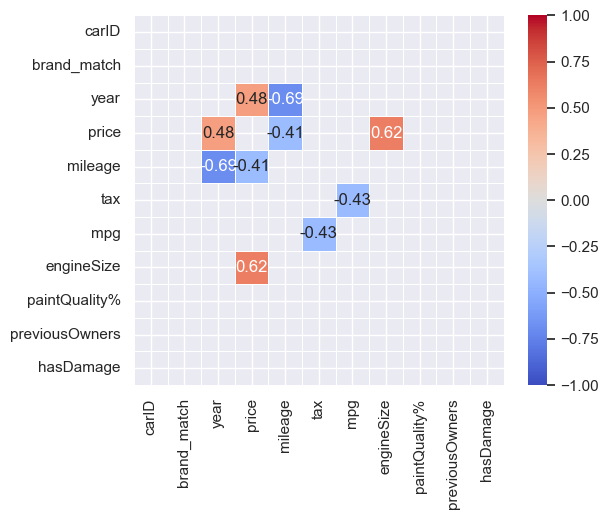

In [25]:
# we turned when engineSize = 0 to null so then we can impute the median for the specific model as we can´t have no engine in a car


clean_engine_size = df['engineSize'] == 0
df.loc[clean_engine_size, 'engineSize'] = np.nan
df['engineSize'].isna().sum()


has_damage_null = df['hasDamage'].isna()
df.loc[has_damage_null]

thr = 0.4
corr = df.corr(numeric_only=True)

mask = corr.abs() < thr                     # hide anything below threshold
# (optional) also hide the diagonal 1.0s:
mask.values[np.diag_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, center=0,
            cmap='coolwarm', annot=True, fmt=".2f", square=True, linewidths=.5)
plt.show()

In [26]:
df.isnull().sum()
df.set_index('carID', inplace=True)

# 2. Preprocessing <a class="anchor" id="2-preprocessing"></a>

# 2.1 Feature Engineering <a class="anchor" id="21-feature"></a>

In [27]:

## Creation of age
ref_year = 2021
df['age'] = ref_year - df['year']

In [28]:
### Creation of log for mileage as it is extremely right_skewed
df['log_mileage'] = np.log(df['mileage'])


In [29]:
index_for_null_brand_and_null_model = df[(df['Brand'].isnull()) & (df['model'].isnull())].index
df = df.drop(index = index_for_null_brand_and_null_model) 
# this cars will be impossible to find which cars are


In [30]:
len(df)
brand_null = df[df['Brand'].isnull()].index
df.drop(index = brand_null, inplace = True)
len(df)
#we drop this as well as the models were not clear, so we could not assign them into a brand
#df.isnull().sum()


75933

In [31]:
# preencher NAN's da coluna hasDamage com 1

df['hasDamage'] = df['hasDamage'].fillna(1)

# 2.2 Splitting Train, Test <a class="anchor" id="022-train"></a>

In [32]:
X = df.drop(['price', 'brand_match'], axis = 1)
y = df['price']

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 42, 
                                                  shuffle = True)


# 2.3 Cleaning Outliers <a class="anchor" id="23-outliers"></a>

In [34]:
a = X_train['mileage'].quantile(0.25)
b = X_train['mileage'].quantile(0.75)
a_b = b - a
a_lower = a -1.5 * a_b
b_larger = b + 1.5 * a_b
X_train.loc[(X_train['mileage'] < a_lower) | (X_train['mileage'] > b_larger)]

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage,age,log_mileage
carID,,,,,,,,,,,,,,
26822,Ford,kuga,2014.0,Manual,75207.0,Diesel,200.0,47.9,2.0,45.0,0.0,0.0,7.0,11.228000
16628,Ford,Fiesta,2007.0,Manual,115000.0,Petrol,160.0,45.6,1.4,53.0,NaN,0.0,14.0,11.652687
10249,BMW,3 Series,2011.0,Automatic,108000.0,Diesel,NaN,46.3,3.0,33.0,2.0,0.0,10.0,11.589887
61332,Opel,Crossland X,2019.0,Manual,83688.0,Petrol,145.0,47.1,1.2,39.0,2.0,0.0,2.0,11.334851
22594,Ford,mondeo,2017.0,Manual,90190.0,Diesel,0.0,74.3,1.5,3.0,1.0,0.0,4.0,11.409674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,Mercedes,C Class,2012.0,Automatic,86663.0,Petrol,160.0,44.8,NaN,56.0,4.0,0.0,9.0,11.369782
37000,Mercedes,E Class,2016.0,Automatic,72000.0,Diesel,30.0,65.7,2.0,80.0,0.0,0.0,5.0,11.184421
24351,Ford,Fiesta,2012.0,Manual,95299.0,Diesel,0.0,68.9,1.6,59.0,3.0,0.0,9.0,11.464775


In [35]:
def cleaning_outliers(training_set, val_set):
    X_train = training_set.copy()
    X_val = val_set.copy()
    num_cols = X_train.select_dtypes(include=np.number).columns
    for col in num_cols:
        q1 = X_train[col].quantile(0.25)
        q3 = X_train[col].quantile(0.75)
        iqr = q3 -q1
        lower = q1 -1.5 * iqr
        larger = q3 + 1.5 * iqr
        X_train.loc[X_train[col] < lower, col] = lower
        X_train.loc[X_train[col] > larger, col] = larger
        X_val.loc[X_val[col] < lower, col] = lower
        X_val.loc[X_val[col] > larger, col] = larger
    return X_train, X_val

X_train, X_val = cleaning_outliers(X_train, X_val)


In [36]:
a = X_train['mileage'].quantile(0.25)
b = X_train['mileage'].quantile(0.75)
a_b = b - a
a_lower = a -1.5 * a_b
b_larger = b + 1.5 * a_b
X_train.loc[(X_train['mileage'] == a_lower) | (X_train['mileage'] == b_larger)]

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage,age,log_mileage
carID,,,,,,,,,,,,,,
26822,Ford,kuga,2014.0,Manual,70698.75,Diesel,175.0,47.9,2.0,45.0,0.0,0.0,7.0,11.228000
16628,Ford,Fiesta,2011.5,Manual,70698.75,Petrol,160.0,45.6,1.4,53.0,NaN,0.0,9.5,11.652687
10249,BMW,3 Series,2011.5,Automatic,70698.75,Diesel,NaN,46.3,3.0,33.0,2.0,0.0,9.5,11.589887
61332,Opel,Crossland X,2019.0,Manual,70698.75,Petrol,145.0,47.1,1.2,39.0,2.0,0.0,2.0,11.334851
22594,Ford,mondeo,2017.0,Manual,70698.75,Diesel,95.0,74.3,1.5,3.0,1.0,0.0,4.0,11.409674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,Mercedes,C Class,2012.0,Automatic,70698.75,Petrol,160.0,44.8,NaN,56.0,4.0,0.0,9.0,11.369782
37000,Mercedes,E Class,2016.0,Automatic,70698.75,Diesel,95.0,65.7,2.0,80.0,0.0,0.0,5.0,11.184421
24351,Ford,Fiesta,2012.0,Manual,70698.75,Diesel,95.0,68.9,1.6,59.0,3.0,0.0,9.0,11.464775


# 2.4 Cleaning NaN <a class="anchor" id="24-nan"></a>

In [37]:
df.isnull().sum()


Brand                0
model             1481
brand_match          0
year              1490
price                0
transmission      1522
mileage           1463
fuelType          1677
tax               7902
mpg               7924
engineSize        1695
paintQuality%     1523
previousOwners    1548
hasDamage            0
age               1490
log_mileage       1463
dtype: int64

In [38]:
## important after trying to solve this
null_dataset = df.copy()
model_null = df.loc[df['model'].isnull()].index
null_dataset= null_dataset.loc[model_null].copy()


In [39]:
# start from your original df
df_cleaned = df.copy()

get_mode = lambda s: s.mode().iat[0] if not s.mode().empty else np.nan

# Brand+year -> model map (learned on train)
by_brand_year_clean_model = (X_train.dropna(subset=['Brand','year','model'])
                   .groupby(['Brand','year'])['model']
                   .agg(get_mode))

# Brand -> model map (fallback, learned on train)
by_brand_clean_model = (X_train.dropna(subset=['Brand','model'])
              .groupby('Brand')['model']
              .agg(get_mode))

def fill_model_using_train_maps(df, by_brand_year, by_brand):
    df = df.copy()
    mask = df['model'].isna()

    # Try Brand+year
    fill1 = (df.loc[mask, ['Brand','year']]
               .merge(by_brand_year.rename('fill'),
                      how='left', left_on=['Brand','year'], right_index=True)['fill'])
    df.loc[mask, 'model'] = fill1.to_numpy()

    # Fallback Brand-only
    mask = df['model'].isna()
    df.loc[mask, 'model'] = df.loc[mask, 'Brand'].map(by_brand)

    return df

X_train = fill_model_using_train_maps(X_train, by_brand_year_clean_model, by_brand_clean_model)
X_val   = fill_model_using_train_maps(X_val,   by_brand_year_clean_model, by_brand_clean_model)


In [40]:
get_median = lambda s: s.median(skipna=True) if s.notna().any() else np.nan

# 1A) Fill by Brand + model median
by_brand_model_clean_year = (X_train.groupby(['Brand','model'])['year']
                   .agg(get_median))
def fill_year_using_train_maps(df, by_brand_model):
    df = df.copy()
    mask = df['year'].isna()

    # Try Brand+year
    fill1 = (df.loc[mask, ['Brand','model']]
               .merge(by_brand_model.rename('fill'),
                      how='left', left_on=['Brand','model'], right_index=True)['fill'])
    df.loc[mask, 'year'] = fill1.to_numpy()

    return df

X_train = fill_year_using_train_maps(X_train, by_brand_model_clean_year)
X_val   = fill_year_using_train_maps(X_val, by_brand_model_clean_year)




In [41]:
#TIVE DE ALTERAR 

### now lets clean transmission
get_mode = lambda s: s.mode().iat[0] if not s.mode().empty else np.nan

# Brand + year -> transmission map
by_brand_model_year_clean_transmission = (
    X_train.dropna(subset=['transmission'])
    .groupby(['Brand', 'model', 'year'])['transmission']
    .agg(get_mode)
)

# Brand + model -> transmission map
by_brand_model_clean_transmission = (
    X_train.dropna(subset=['transmission'])
    .groupby(['Brand', 'model'])['transmission']
    .agg(get_mode)
)

def fill_transmission_using_train_maps(df, by_brand_year, by_brand_model):
    df = df.copy()
    mask = df['transmission'].isna()

    # Try Brand + year
    fill1 = (
        df.loc[mask, ['Brand', 'model', 'year']]
        .merge(by_brand_year.rename('fill'),
               how='left',
               left_on=['Brand', 'model', 'year'],
               right_index=True)['fill']
    )
    df.loc[mask, 'transmission'] = fill1.to_numpy()

    # Try Brand + model
    mask = df['transmission'].isna()
    keys = pd.MultiIndex.from_frame(df.loc[mask, ['Brand', 'model']])
    df.loc[mask, 'transmission'] = by_brand_model.reindex(keys).to_numpy()

    return df

# Apply
X_train = fill_transmission_using_train_maps(X_train, by_brand_model_year_clean_transmission, by_brand_model_clean_transmission)
X_val   = fill_transmission_using_train_maps(X_val,   by_brand_model_year_clean_transmission, by_brand_model_clean_transmission)

In [42]:
### now clean mileage here makes more sense to use median for the year
get_median = lambda s: s.median(skipna=True) if s.notna().any() else np.nan

# 1A) Fill by Brand + model median
by_year_clean_mileage = (X_train.dropna(subset = ['mileage']).groupby(['year'])['mileage']
                   .agg(get_median))

def fill_mileage_using_train_maps(df, by_year):
    df = df.copy()
    mask = df['mileage'].isna()

    # Try Brand+year
    fill1 = (df.loc[mask, ['year']]
               .merge(by_year.rename('fill'),
                      how='left', left_on=['year'], right_index=True)['fill'])
    df.loc[mask, 'mileage'] = fill1.to_numpy()

    return df

X_train = fill_mileage_using_train_maps(X_train, by_year_clean_mileage)
X_val   = fill_mileage_using_train_maps(X_val, by_year_clean_mileage)



In [43]:
#TIVE DE ALTERAR 

### now lets clean fuelType
get_mode = lambda s: s.mode().iat[0] if not s.mode().empty else np.nan

# Brand + model + year -> fuelType map (learned on train)
by_brand_model_year_clean_fuelType = (
    X_train.dropna(subset=['fuelType'])
    .groupby(['Brand', 'model', 'year'])['fuelType']
    .agg(get_mode)
)

# Brand + model -> fuelType map
by_brand_model_clean_fuelType = (
    X_train.dropna(subset=['fuelType'])
    .groupby(['Brand', 'model'])['fuelType']
    .agg(get_mode)
)

# Brand -> fuelType map
by_brand_clean_fuelType = (
    X_train.dropna(subset=['fuelType'])
    .groupby(['Brand'])['fuelType']
    .agg(get_mode)
)


def fill_fuelType_using_train_maps(df, by_brand_year, by_brand_model, by_brand):
    df = df.copy()
    mask = df['fuelType'].isna()

    # Try Brand + model + year
    fill1 = (
        df.loc[mask, ['Brand', 'model', 'year']]
        .merge(by_brand_year.rename('fill'),
               how='left',
               left_on=['Brand', 'model', 'year'],
               right_index=True)['fill']
    )
    df.loc[mask, 'fuelType'] = fill1.to_numpy()

    # Try Brand + model
    mask = df['fuelType'].isna()
    if mask.any():
        keys = pd.MultiIndex.from_frame(df.loc[mask, ['Brand', 'model']])
        df.loc[mask, 'fuelType'] = by_brand_model.reindex(keys).to_numpy()

    # Try Brand only
    mask = df['fuelType'].isna()
    if mask.any():
        df.loc[mask, 'fuelType'] = df.loc[mask, 'Brand'].map(by_brand)

    return df


# Apply to train and validation sets
X_train = fill_fuelType_using_train_maps(
    X_train,
    by_brand_model_year_clean_fuelType,
    by_brand_model_clean_fuelType,
    by_brand_clean_fuelType
)

X_val = fill_fuelType_using_train_maps(
    X_val,
    by_brand_model_year_clean_fuelType,
    by_brand_model_clean_fuelType,
    by_brand_clean_fuelType
)

In [44]:
#LIMPAR tax

get_median = lambda s: s.median(skipna=True) if s.notna().any() else np.nan

# Brand + model + year -> (learned on train)
by_brand_model_year_clean_tax = (X_train.dropna(subset=['tax'])
                       .groupby(['Brand','model','year'])['tax']
                       .agg(get_median))
by_brand_model_clean_tax = (X_train.dropna(subset=['tax'])
                  .groupby(['Brand','model'])['tax']
                  .agg(get_median))
by_brand_clean_tax = (X_train.dropna(subset=['tax'])
            .groupby(['Brand'])['tax']
            .agg(get_median))

def fill_tax_using_train_maps(df, by_brand_model_year, by_brand_model, by_brand):
    df = df.copy()
    mask = df['tax'].isna()

    # Try Brand+Model+Year
    fill1 = (df.loc[mask, ['Brand','model','year']]
               .merge(by_brand_model_year.rename('fill'),
                      how='left', left_on=['Brand','model','year'], right_index=True)['fill'])
    df.loc[mask, 'tax'] = fill1.to_numpy()
    mask = df['tax'].isna()
    
    # Try Brand+Model
    keys = pd.MultiIndex.from_frame(df.loc[mask, ['Brand','model']])
    df.loc[mask, 'tax'] = by_brand_model.reindex(keys).to_numpy()

    # Try Brand
    mask = df['tax'].isna()
    df.loc[mask, 'tax'] = df.loc[mask, 'Brand'].map(by_brand)

    return df


X_train = fill_tax_using_train_maps(X_train, by_brand_model_year_clean_tax, by_brand_model_clean_tax, by_brand_clean_tax)
X_val   = fill_tax_using_train_maps(X_val, by_brand_model_year_clean_tax, by_brand_model_clean_tax, by_brand_clean_tax)


In [45]:
#LIMPAR mpg

get_median = lambda s: s.median(skipna=True) if s.notna().any() else np.nan

# 1A) Fill by Brand + model median
by_brand_model_year_clean_mileage = (X_train.dropna(subset = 'mpg').groupby(['Brand','model','year'])['mpg']
                   .agg(get_median))
by_brand_model_clean_mileage = (X_train.dropna(subset = 'mpg').groupby(['Brand','model'])['mpg']
                   .agg(get_median))
by_brand_clean_mileage = (X_train.dropna(subset = 'mpg').groupby(['Brand'])['mpg']
                   .agg(get_median))
def fill_mpg_train_maps(df, by_brand_model_year, by_brand_model):
    df = df.copy()
    mask = df['mpg'].isna()

    # Try Brand+year
    fill1 = (df.loc[mask, ['Brand', 'model', 'year']]
               .merge(by_brand_model_year.rename('fill'),
                      how='left', left_on=['Brand', 'model', 'year'], right_index=True)['fill'])
    df.loc[mask, 'mpg'] = fill1.to_numpy()

    mask = df['mpg'].isna()

    # Try Brand+year
    fill2 = (df.loc[mask, ['Brand', 'model']]
               .merge(by_brand_model.rename('fill'),
                      how='left', left_on=['Brand', 'model'], right_index=True)['fill'])
    df.loc[mask, 'mpg'] = fill2.to_numpy()



    return df

X_train = fill_mpg_train_maps(X_train, by_brand_model_year_clean_mileage, by_brand_model_clean_mileage)
X_val   = fill_mpg_train_maps(X_val, by_brand_model_year_clean_mileage,by_brand_model_clean_mileage)

In [46]:
#LIMPAR engineSize

get_median = lambda s: s.median(skipna=True) if s.notna().any() else np.nan

# Brand + model + year -> (learned on train)
by_brand_model_year_clean_engineSize = (X_train.dropna(subset=['engineSize'])
                       .groupby(['Brand','model','year'])['engineSize']
                       .agg(get_median))
by_brand_model_clean_engineSize = (X_train.dropna(subset=['engineSize'])
                  .groupby(['Brand','model'])['engineSize']
                  .agg(get_median))
by_brand_clean_engineSize = (X_train.dropna(subset=['engineSize'])
            .groupby(['Brand'])['engineSize']
            .agg(get_median))

def fill_engineSize_using_train_maps(df, by_brand_model_year, by_brand_model, by_brand):
    df = df.copy()
    mask = df['engineSize'].isna()

    # Try Brand+Model+Year
    fill1 = (df.loc[mask, ['Brand','model','year']]
               .merge(by_brand_model_year.rename('fill'),
                      how='left', left_on=['Brand','model','year'], right_index=True)['fill'])
    df.loc[mask, 'engineSize'] = fill1.to_numpy()
    mask = df['engineSize'].isna()
    
    # Try Brand+Model
    keys = pd.MultiIndex.from_frame(df.loc[mask, ['Brand','model']])
    df.loc[mask, 'engineSize'] = by_brand_model.reindex(keys).to_numpy()

    # Try Brand
    mask = df['engineSize'].isna()
    df.loc[mask, 'engineSize'] = df.loc[mask, 'Brand'].map(by_brand)

    return df

X_train = fill_engineSize_using_train_maps(X_train, by_brand_model_year_clean_engineSize, by_brand_model_clean_engineSize, by_brand_clean_engineSize)
X_val   = fill_engineSize_using_train_maps(X_val, by_brand_model_year_clean_engineSize, by_brand_model_clean_engineSize, by_brand_clean_engineSize)


In [47]:
#LIMPAR paintQuality% 

get_median = lambda s: s.median(skipna=True) if s.notna().any() else np.nan

# Brand + model + year -> (learned on train)
by_brand_model_year_clean_paintQuality = (X_train.dropna(subset=['paintQuality%'])
                       .groupby(['Brand','model','year'])['paintQuality%']
                       .agg(get_median))
by_brand_model_clean_paintQuality = (X_train.dropna(subset=['paintQuality%'])
                  .groupby(['Brand','model'])['paintQuality%']
                  .agg(get_median))
by_brand_clean_paintQuality = (X_train.dropna(subset=['paintQuality%'])
            .groupby(['Brand'])['paintQuality%']
            .agg(get_median))

def fill_paintQuality_using_train_maps(df, by_brand_model_year, by_brand_model, by_brand):
    df = df.copy()
    mask = df['paintQuality%'].isna()

    # Try Brand+Model+Year
    fill1 = (df.loc[mask, ['Brand','model','year']]
               .merge(by_brand_model_year.rename('fill'),
                      how='left', left_on=['Brand','model','year'], right_index=True)['fill'])
    df.loc[mask, 'paintQuality%'] = fill1.to_numpy()
    mask = df['paintQuality%'].isna()
    
    # Try Brand+Model
    keys = pd.MultiIndex.from_frame(df.loc[mask, ['Brand','model']])
    df.loc[mask, 'paintQuality%'] = by_brand_model.reindex(keys).to_numpy()

    # Try Brand
    mask = df['paintQuality%'].isna()
    df.loc[mask, 'paintQuality%'] = df.loc[mask, 'Brand'].map(by_brand)

    return df

X_train = fill_paintQuality_using_train_maps(X_train, by_brand_model_year_clean_paintQuality, by_brand_model_clean_paintQuality, by_brand_clean_paintQuality)
X_val   = fill_paintQuality_using_train_maps(X_val, by_brand_model_year_clean_paintQuality, by_brand_model_clean_paintQuality, by_brand_clean_paintQuality)

In [48]:
#LIMPAR previousOwners

get_median = lambda s: s.median(skipna=True) if s.notna().any() else np.nan

# 1A) Fill by Brand + model median
by_brand_model_year_clean_previousOwners = (X_train.dropna(subset = 'previousOwners').groupby(['Brand','model','year'])['previousOwners']
                   .agg(get_median))
by_brand_model_clean_previousOwners = (X_train.dropna(subset = 'previousOwners').groupby(['Brand','model'])['previousOwners']
                   .agg(get_median))
by_brand_clean_previousOwners = (X_train.dropna(subset = 'previousOwners').groupby(['Brand'])['previousOwners']
                   .agg(get_median))
def fill_previousOwners_train_maps(df, by_brand_model_year, by_brand_model, by_brand):
    df = df.copy()
    mask = df['previousOwners'].isna()

    # Try Brand+year
    fill1 = (df.loc[mask, ['Brand', 'model', 'year']]
               .merge(by_brand_model_year.rename('fill'),
                      how='left', left_on=['Brand', 'model', 'year'], right_index=True)['fill'])
    df.loc[mask, 'previousOwners'] = fill1.to_numpy()

    mask = df['previousOwners'].isna()

    # Try Brand+year
    fill2 = (df.loc[mask, ['Brand', 'model']]
               .merge(by_brand_model.rename('fill'),
                      how='left', left_on=['Brand', 'model'], right_index=True)['fill'])
    df.loc[mask, 'previousOwners'] = fill2.to_numpy()
    mask = df['previousOwners'].isna()
    fill3 = (df.loc[mask, ['Brand']]
               .merge(by_brand.rename('fill'),
                      how='left', left_on=['Brand'], right_index=True)['fill'])
    df.loc[mask, 'previousOwners'] = fill3.to_numpy()



    return df

X_train = fill_previousOwners_train_maps(X_train, by_brand_model_year_clean_previousOwners, by_brand_model_clean_previousOwners, by_brand_clean_previousOwners)
X_val   = fill_previousOwners_train_maps(X_val, by_brand_model_year_clean_previousOwners,by_brand_model_clean_previousOwners, by_brand_clean_previousOwners)

In [49]:
# input NaNs for age
def clean_age(df, ref_year = 2021):
    df = df.copy()
    mask = df['age'].isna()
    df.loc[mask, 'age'] = ref_year -df.loc[mask, 'year']
    return df
    
X_train = clean_age(X_train)
X_val   = clean_age(X_val)

In [50]:
def clean_log_mileage(df):
    df = df.copy()
    mask = df['log_mileage'].isna()
    df.loc[mask, 'log_mileage'] = np.log(df.loc[mask, 'mileage'])
    return df
X_train = clean_log_mileage(X_train)
X_val = clean_log_mileage(X_val)

In [51]:
#turning object int categories

for col in df.columns:
    if df[col].dtype == 'object':
        X_train[col] = X_train[col].astype('category')
        X_val[col] = X_val[col].astype('category')

In [52]:
X_train['year'] = X_train['year'].astype('int')
X_train['year'].value_counts()
X_val['year'] = X_val['year'].astype('int')
X_val['year'].value_counts()


2019    6023
2017    5257
2016    3450
2018    3167
2015    1712
2020     999
2014     857
2013     590
2011     512
2012     130
2023      83
Name: year, dtype: int64

# 3 Modelling <a class="anchor" id="3-modelling"></a>

In [53]:
X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
X_train_num.drop('hasDamage', axis = 1, inplace = True)


X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)
X_train_cat['hasDamage'] = X_train['hasDamage']

# Repeat for Validation
#CODE HERE
X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)
X_val_num.drop('hasDamage', axis = 1, inplace = True)


X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)
X_val_cat['hasDamage'] = X_val['hasDamage']

##### Using standard Scaler

In [54]:
#imported here for demonstrative purposes but it is a good practice to import everything at the start.
from sklearn.preprocessing import StandardScaler

#call function
scaler = StandardScaler()

#fit to training data
scaler.fit(X_train_num)

#transform the data
X_train_num_scaled = scaler.transform(X_train_num) # this will return an array

#show results
X_train_num_scaled

X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train.index)
X_train_num_scaled

,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,age,log_mileage
carID,,,,,,,,,
75177,2.960566,-0.590067,0.445656,-0.465294,0.654021,-0.463108,-1.421418,-2.999915,-0.188850
27964,0.936377,-0.799479,0.655997,-0.309005,-1.233450,-0.755402,1.388510,-0.944689,-0.556663
38304,1.442424,-1.196836,0.445656,-0.942844,-0.667209,0.048407,-0.016454,-1.458495,-2.470552
67327,1.442424,-1.094065,0.655997,-0.395832,0.654021,0.949647,-0.016454,-1.458495,-1.728444
55755,0.430330,-0.211049,0.445656,0.342200,-0.289715,-0.073382,-0.016454,-0.430882,0.233085
...,...,...,...,...,...,...,...,...,...
40634,-0.075717,0.689139,0.445656,-0.612900,0.654021,0.900931,1.388510,0.082925,0.797414
57064,0.936377,-0.527472,0.445656,-0.682362,-0.855956,1.582951,-0.718936,-0.944689,-0.103506
8896,0.936377,-0.897586,0.445656,0.932626,0.654021,1.144510,-0.016454,-0.944689,-0.802865


In [55]:
X_val_num_scaled = scaler.transform(X_val_num)
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns).set_index(X_val.index)


<Axes: >

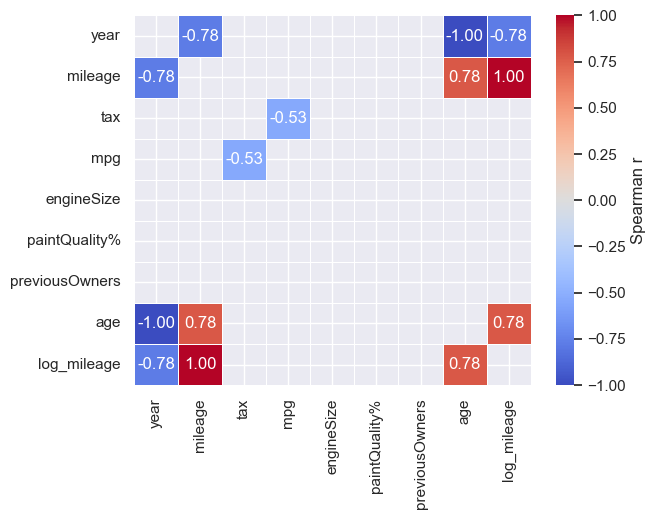

In [56]:
cor_spearman = X_train_num_scaled.corr(method ='spearman')


thr = 0.4
M = cor_spearman            # the EXACT matrix you'll plot (same rows/cols)

mask = M.abs() < thr        # True => hide |r| < 0.4
mask.values[range(len(M)), range(len(M))] = True  # optional: hide diagonal

sns.heatmap(M, mask=mask, vmin=-1, vmax=1, center=0,
            cmap='coolwarm', annot=True, fmt=".2f",
            linewidths=.5, linecolor="white",
            cbar_kws={"label": "Spearman r"})


In [57]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [58]:
for var in X_train_cat:
    TestIndependence(X_train_cat[var],y_train, var)
# i will drop transmission
X_train_cat = X_train_cat.drop('transmission', axis = 1)
X_val_cat = X_val_cat.drop('transmission', axis = 1)

Brand is IMPORTANT for Prediction
model is IMPORTANT for Prediction
transmission is NOT an important predictor. (Discard transmission from model)
fuelType is IMPORTANT for Prediction
hasDamage is NOT an important predictor. (Discard hasDamage from model)


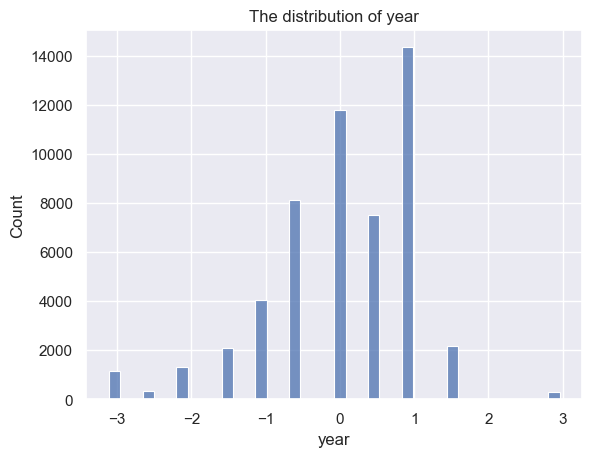

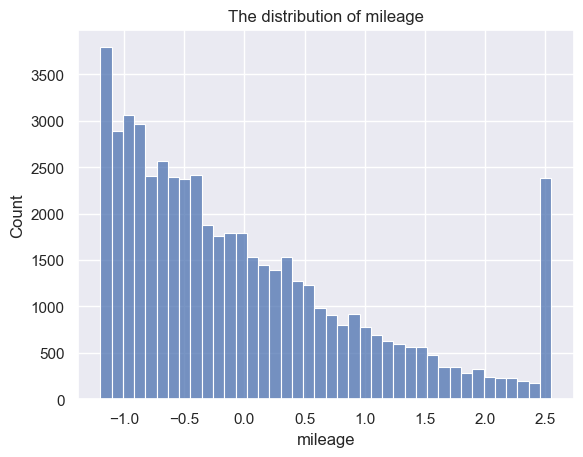

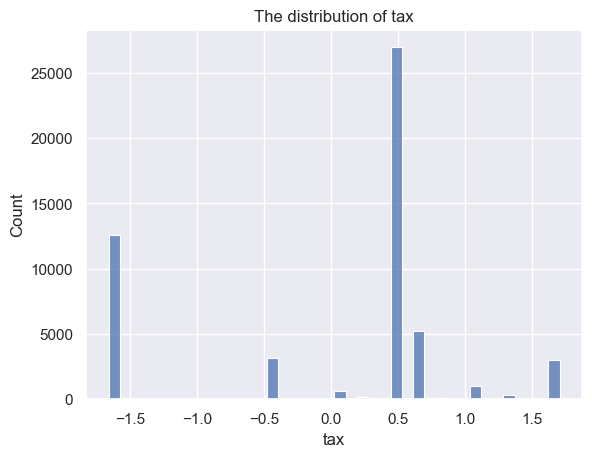

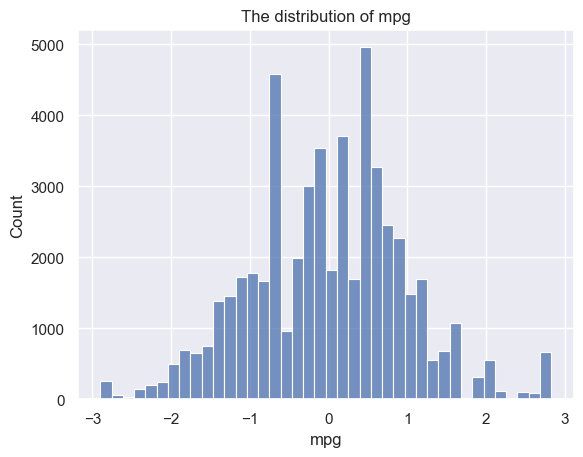

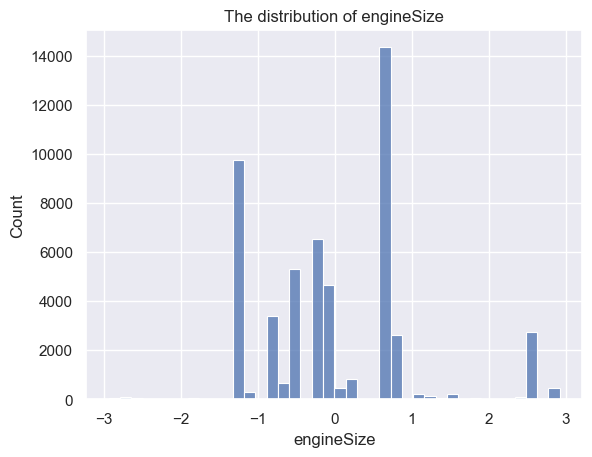

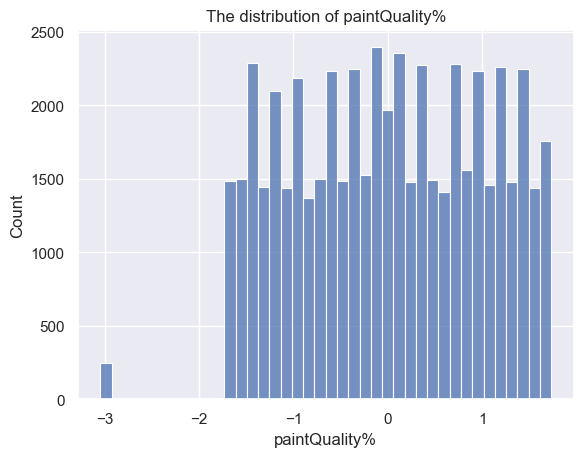

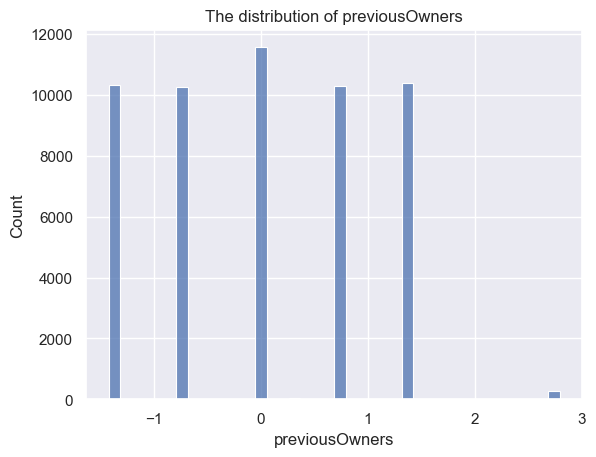

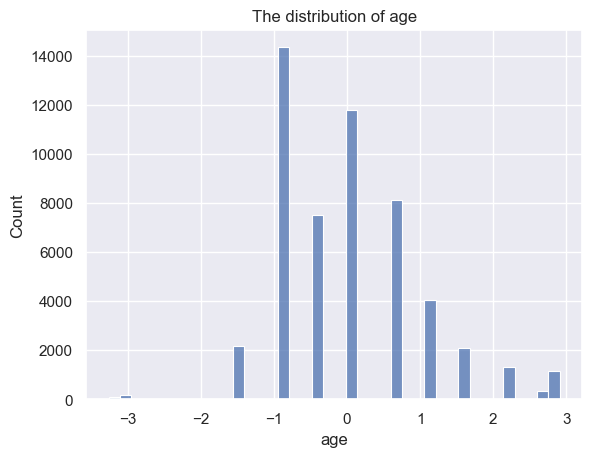

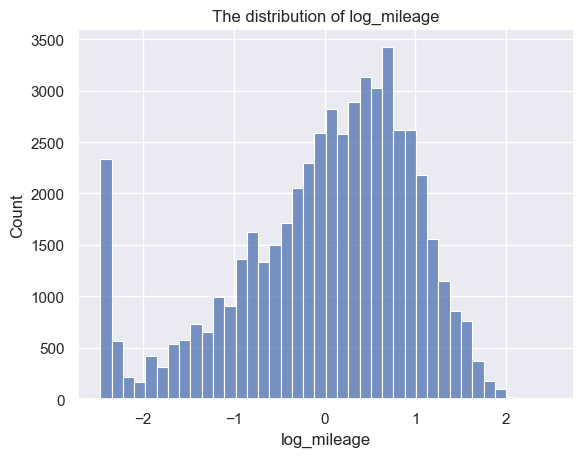

In [59]:
for col in X_train_num.columns:
    sns.histplot(X_train_num_scaled[col], bins = 40)
    plt.title(f'The distribution of {col}')
    plt.show()

In [60]:
#### as we created log mileage and age we have to drop year and mileage

X_train_num_scaled.drop('year', axis = 1, inplace = True)
X_train_num_scaled.drop('mileage', axis = 1, inplace = True)
X_val_num_scaled.drop('year', axis = 1, inplace = True)
X_val_num_scaled.drop('mileage', axis = 1, inplace = True)



In [61]:
### One hot encoding categorical variables to include in the model
one_encoding_train = pd.get_dummies(X_train_cat, drop_first = False, prefix_sep = '=')
one_encoding_val = pd.get_dummies(X_val_cat, drop_first = False, prefix_sep = '=')
one_encoding_val = one_encoding_val.reindex(columns=one_encoding_train.columns, fill_value=0)
X_train_prepared = pd.concat([X_train_num_scaled.reset_index(drop = True),
                         one_encoding_train.reset_index(drop = True)], axis = 1)
X_val_prepared = pd.concat([X_val_num_scaled.reset_index(drop = True),
                         one_encoding_val.reset_index(drop = True)], axis = 1)
X_train_prepared.shape
X_val_prepared.shape

(22780, 254)

### Start modelling ####

In [62]:
from sklearn.model_selection import KFold

cv = KFold(
    n_splits=5, 
    shuffle=True, 
    random_state=42
)

<Axes: xlabel='price', ylabel='Density'>

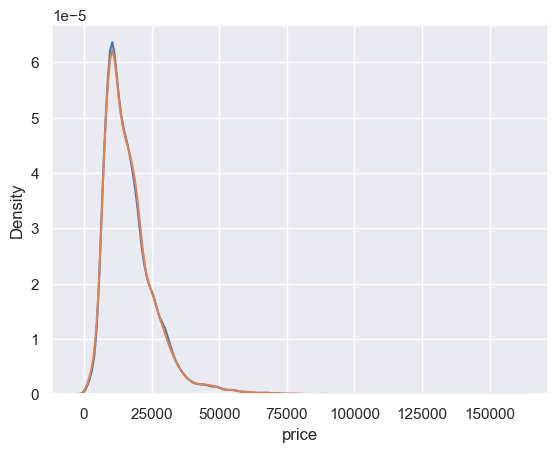

In [63]:
import seaborn as sns
sns.kdeplot(y_train, label='train/val')
sns.kdeplot(y_val, label='test')

In [64]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error

# Create Elastic Net model with alpha=1.0 and l1_ratio=0.5 (equal mix of L1 and L2)
elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=10000)

# Fit the model
elastic_model.fit(X_train_prepared, y_train)

# Make predictions
y_pred_elastic_train = elastic_model.predict(X_train_prepared)
y_pred_elastic_val = elastic_model.predict(X_val_prepared)

# Evaluate the model
print("Elastic Net Regression Results:")
print(f"Training R²: {r2_score(y_train, y_pred_elastic_train):.4f}")
print(f"Validation R²: {r2_score(y_val, y_pred_elastic_val):.4f}")
print(f"Training MAE: {mean_absolute_error(y_train, y_pred_elastic_train):.2f}")
print(f"Validation MAE: {mean_absolute_error(y_val, y_pred_elastic_val):.2f}")
print(f"\nIntercept: {elastic_model.intercept_:.2f}")
print("Coefficients:")
for feature, coef in zip(X_train_prepared.columns, elastic_model.coef_):
    print(f"  {feature}: {coef:.4f}")
    
# Count how many features were selected (non-zero coefficients)
n_features_selected = sum(elastic_model.coef_ != 0)
print(f"\nFeatures selected: {n_features_selected} out of {len(elastic_model.coef_)}")


Elastic Net Regression Results:
Training R²: 0.6590
Validation R²: 0.6725
Training MAE: 3559.05
Validation MAE: 3539.44

Intercept: 17067.01
Coefficients:
  tax: 253.8834
  mpg: -1421.2953
  engineSize: 3316.1682
  paintQuality%: -9.9431
  previousOwners: -1.2465
  age: -2100.7503
  log_mileage: -1977.4321
  hasDamage: 0.0000
  Brand=Audi: 602.0037
  Brand=BMW: 366.7182
  Brand=Ford: -409.8959
  Brand=Hyundai: -242.3517
  Brand=Mercedes: 1026.3650
  Brand=Opel: -961.0689
  Brand=Skoda: -166.2084
  Brand=Toyota: -169.5980
  Brand=Volkswagen: -42.9636
  model=1 Series: -58.3645
  model=2 Series: -14.4461
  model=220: -0.0000
  model=230: -0.0000
  model=3 Series: 10.8317
  model=4 Series: 4.8535
  model=5 Series: 43.7041
  model=6 Series: -0.0000
  model=7 Series: 12.9752
  model=8 Series: 23.2740
  model=A Class: 84.6323
  model=A1: 9.3693
  model=A2: -0.0000
  model=A3: 43.5643
  model=A4: 15.8138
  model=A5: 31.7138
  model=A6: 27.3947
  model=A7: 1.8190
  model=A8: 10.9944
  model=Ad

In [65]:
from sklearn.linear_model import Lasso

# Create Lasso regression model with alpha=1.0
lasso_model = Lasso(alpha=1.0, max_iter=10000)


# Fit the model
lasso_model.fit(X_train_prepared, y_train)

# Make predictions
y_pred_lasso_train = lasso_model.predict(X_train_prepared)
y_pred_lasso_val = lasso_model.predict(X_val_prepared)

# Evaluate the model
print("Lasso Regression Results:")
print(f"Training R²: {r2_score(y_train, y_pred_lasso_train):.4f}")
print(f"Validation R²: {r2_score(y_val, y_pred_lasso_val):.4f}")
print(f"Training MAE: {mean_absolute_error(y_train, y_pred_lasso_train):.2f}")
print(f"Validation MAE: {mean_absolute_error(y_val, y_pred_lasso_val):.2f}")
print(f"\nIntercept: {lasso_model.intercept_:.2f}")
print("Coefficients:")
for feature, coef in zip(X_train.columns, lasso_model.coef_):
    print(f"  {feature}: {coef:.4f}")

Lasso Regression Results:
Training R²: 0.8371
Validation R²: 0.8418
Training MAE: 2469.46
Validation MAE: 2472.85

Intercept: 15825.49
Coefficients:
  Brand: -649.2542
  model: -1315.9481
  year: 3035.7767
  transmission: -6.9482
  mileage: 2.3379
  fuelType: -2695.5674
  tax: -2479.1930
  mpg: 0.0000
  engineSize: 6878.4363
  paintQuality%: 9040.7826
  previousOwners: -0.0000
  hasDamage: -1339.5360
  age: 5694.8476
  log_mileage: -3128.6266


In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
model = LinearRegression()

In [67]:
#RFE using LinearRegression (RFE LR)

#no of features
nof_list=np.arange(1,len(X_train_num_scaled.columns)+1)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LinearRegression()
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train)
    X_val_rfe = rfe.transform(X_val_num_scaled)
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on validation data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
        features_to_select = pd.Series(rfe.support_, index = X_train_num_scaled.columns)

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
print(f"Features to select: \n{features_to_select}")
rfe.ranking_

Optimum number of features: 7
Score with 7 features: 0.697126
Features to select: 
tax               True
mpg               True
engineSize        True
paintQuality%     True
previousOwners    True
age               True
log_mileage       True
dtype: bool


array([1, 1, 1, 1, 1, 1, 1])

In [68]:
rfe.get_support()

array([ True,  True,  True,  True,  True,  True,  True])

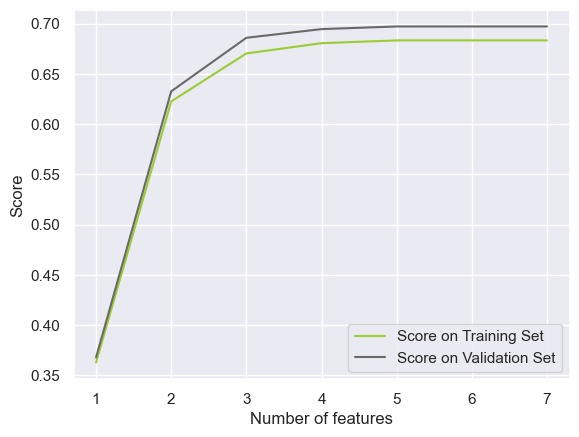

In [69]:
plt.plot(list(range(1,8)), train_score_list, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,8)), val_score_list, label="Score on Validation Set", color='dimgray')
plt.xlabel("Number of features")
plt.ylabel("Score")
plt.legend()
plt.show()

In [70]:
#We tried RFE using Support Vector Classifier (RFE SVM) but was too heavy and did not run 

In [71]:
reg = LassoCV()

reg.fit(X_train_num_scaled, y_train)
coef = pd.Series(reg.coef_, index = X_train_num_scaled.columns)
coef

tax               -616.642824
mpg              -1369.627712
engineSize        5802.743566
paintQuality%      -16.945164
previousOwners      -0.000000
age              -3058.647997
log_mileage      -2638.310880
dtype: float64

#### Results

In [89]:
#Numerical Data
num_features = ['tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners', 'age', 'log_mileage']

#Results
spearman_keep = ['tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners'] #age and log_mileage: corr -0.78
rfe_lr_keep = ['tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners', 'age', 'log_mileage'] #keep all
lasso_keep = ['tax', 'mpg', 'engineSize', 'paintQuality%', 'age', 'log_mileage'] #previousOwners: coef 0 

def decision(var, kept_list):
    return "Keep" if var in kept_list else "Discard"

table = pd.DataFrame({
    'Numeric Variable': num_features,
    'Spearman': [decision(f, spearman_keep) for f in num_features],
    'RFE LR': [decision(f, rfe_lr_keep) for f in num_features],
    'Lasso': [decision(f, lasso_keep) for f in num_features],
})

#Suggestion: 3 keep's = keep, 2 discards's = discard, otherwise try both ways
def what_to_do(row):
    keep_count = sum(v == "Keep" for v in row[1:])
    if keep_count == 3:
        return "Include"
    elif keep_count == 2:
        return "Try with and without"
    else:
        return "Discard"

table["What to do?"] = table.apply(what_to_do, axis=1)
display(table.style.hide(axis="index"))

Numeric Variable,Spearman,RFE LR,Lasso,What to do?
tax,Keep,Keep,Keep,Include
mpg,Keep,Keep,Keep,Include
engineSize,Keep,Keep,Keep,Include
paintQuality%,Keep,Keep,Keep,Include
previousOwners,Keep,Keep,Discard,Try with and without
age,Discard,Keep,Keep,Try with and without
log_mileage,Discard,Keep,Keep,Try with and without


In [ ]:
#Categorical Data
cat_features = ['Brand', 'model', 'transmission', 'fuelType', 'hasDamage']

#Results from Chi-Square
chi_square_results = {
    'Brand': 'Keep',
    'model': 'Keep',
    'transmission': 'Keep',
    'fuelType': 'Keep',
    'hasDamage': 'Discard'
}

categorical_table = pd.DataFrame({
    'Categorical Variable': cat_features,
    'Chi-Square': [chi_square_results[f] for f in cat_features]
})

display(categorical_table.style.hide(axis="index"))

Categorical Variable,Chi-Square
Brand,Keep
model,Keep
transmission,Discard
fuelType,Keep
hasDamage,Discard


# 4. Test <a class="anchor" id="4-test"></a>

In [74]:

test = pd.read_csv('test.csv')

### Clean the brand in test

In [75]:
test["Brand"] = clean_categorical(test["Brand"],brand_mapping)

In [76]:
test = match_car_models_df(
    test,
    model_column='model',
    brand_column='Brand',
    model_to_brand=model_to_brand,
    misspelling_corrections=misspelling_model_corrections,
    unknown_models=unknown_models
)

Debug: Unmatched models after cleaning: {'s5', '6 series', 'rapid', 'b-max', 'karoq', 'kuga', 'prius', '5 series', '4 series', 'amarok', 'm class', 'fabia', '8 series', 'rav4', 'c-hr', 'gla class', 'polo', 'viva', 'glc class', 'supra', 'x-class', 'californi', 'gls class', 'm6', 'zafira', 'tt', 'edge', 'proace verso', 'mokka', 'ecosport', 'touran', 'fiesta', 'a6', 'c class', 'i3', 'touareg', 'sl class', 'a3', 'ka', 'mustang', 'z3', 'zafira tourer', 'rs4', 'agila', 'a7', 'corolla', 'veloster', '3 series', 'terracan', 'arteon', 'vivaro', 'a8', 'cc', 'meriva', 's-max', 'citigo', 'eos', 'tucson', 'california', 'i800', 'tigra', 'hilux', 'fox', 'jetta', 's class', 'aygo', 'e class', 'gt86', 'a4', 'pum', 'roomster', 'clk', '2 series', 'x4', 'sq7', 'passat', 'q7', 'ioniq', 'x6', 'up', 'cascada', 'rs5', 'q8', 't-roc', 'caddy', 'i30', 'golf', 'i4', 's4', 'vectra', 'r8', 't-cross', 'x2', 'x1', 'yeti outdoor', 'g class', 'corsa', 'rs7', 'santa fe', '1 series', 'z4', 'land cruiser', 'avensis', 'camr

In [77]:
test['model'].nunique()

224

In [78]:
test = clean_vehicle_dataframe(test)

In [79]:
test.head()

,carID,Brand,model,brand_match,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,89856,Hyundai,I30,1.0,2023.0,Automatic,30700.0,Petrol,205.0,41.5,1.6,61.0,3.0,0.0
1,106581,Volkswagen,tiguan,1.0,2017.0,Semi-Auto,48191.0,Petrol,150.0,38.2,2.0,60.0,2.0,0.0
2,80886,BMW,2 Series,1.0,2016.0,Automatic,36792.0,Petrol,125.0,51.4,1.5,94.0,2.0,0.0
3,100174,Opel,Grandland X,1.0,2019.0,Manual,5533.0,Petrol,145.0,44.1,1.2,77.0,1.0,0.0
4,81376,BMW,1 Series,1.0,2019.0,Semi-Auto,9058.0,Diesel,150.0,51.4,2.0,45.0,4.0,0.0


In [80]:
clean_max_paintquality = test['paintQuality%'] > 100
test.loc[clean_max_paintquality, 'paintQuality%'] = 100

In [81]:
clean_fueltype = test['fuelType'] == 'Other'
test.loc[clean_fueltype, 'fuelType'] = np.nan

In [82]:
clean_engine_size = test['engineSize'] == 0
test.loc[clean_engine_size, 'engineSize'] = np.nan

test['hasDamage'] = test['hasDamage'].fillna(1)


In [83]:
test['transmission'].unique()
test.describe()

,carID,brand_match,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
count,32567.000000,32567.000000,31914.000000,31878.000000,29259.000000,29279.000000,31846.000000,31942.000000,31970.000000,32567.000000
mean,92256.000000,0.977001,2017.102244,23453.888889,121.084624,55.261034,1.670423,64.313381,2.027557,0.018331
std,9401.427445,0.149902,2.205807,21600.874789,64.597275,17.486063,0.567333,20.837548,1.434448,0.134149
min,75973.000000,0.000000,1991.000000,1.000000,0.000000,0.300000,0.100000,2.000000,0.000000,0.000000
25%,84114.500000,1.000000,2016.000000,7500.000000,125.000000,46.300000,1.200000,47.000000,1.000000,0.000000
50%,92256.000000,1.000000,2017.000000,17500.000000,145.000000,54.300000,1.600000,65.000000,2.000000,0.000000
75%,100397.500000,1.000000,2019.000000,32974.750000,145.000000,62.800000,2.000000,82.000000,3.000000,0.000000
max,108539.000000,1.000000,2024.000000,279000.000000,580.000000,470.800000,6.600000,100.000000,6.000000,1.000000


In [84]:
test['age'] = ref_year - test['year']
test['log_mileage'] = np.log(test['mileage'])


In [85]:
test.isna().sum()

carID                0
Brand               17
model              650
brand_match          0
year               653
transmission       623
mileage            689
fuelType           738
tax               3308
mpg               3288
engineSize         721
paintQuality%      625
previousOwners     597
hasDamage            0
age                653
log_mileage        689
dtype: int64